### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

**Independent variable** congruent words condition - incongruent words condition 


**dependent variable** time

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

$$H_0: \mu_{cong} - \mu_{incong} = 0$$
$$H_n: \mu_{cong} - \mu_{incong} \neq 0$$

$\mu$ represent the mean of the sample.

The null hypothesis is there is no difference between the paired samples mean. (the difference is zero).  
The alternative hypothesis is there is a difference between the paired samples means.  

We will use the sample to test the hypothesis, then to make inferences about the population. 

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import iqr

In [8]:
df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [9]:
print(df.count())

Congruent      24
Incongruent    24
dtype: int64


In [10]:
#measure of central 
print(df['Congruent'].mean()) #the mean of congruent

print(df['Incongruent'].mean()) #the mean of incongruent

14.051125000000004
22.01591666666667


In [11]:
#measure of central 
print(df['Congruent'].median()) #the median of congruent

print(df['Incongruent'].median()) #the median of incongruent

14.3565
21.0175


In [12]:
df['Congruent'].mean() - df['Incongruent'].mean()

-7.964791666666665

In [13]:
#measure of variability
print(df['Congruent'].max() - df['Congruent'].min())# Congruent range
print(df['Incongruent'].max() - df['Incongruent'].min())# Incongruent range

13.698000000000002
19.568


In [14]:
iqr(df['Congruent'])

4.3054999999999986

In [15]:
iqr(df['Incongruent'])

5.33475

In [16]:
print(df.std())

Congruent      3.559358
Incongruent    4.797057
dtype: float64


Based on the analysis initially we may reject the null hypothesis. THe congruent reading is faster than incongruent reading

We can interpret that the incongruent reading spread wider than the congruent

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

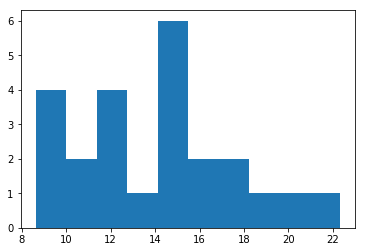

In [17]:
# Build the visualizations here
plt.hist(df['Congruent']);

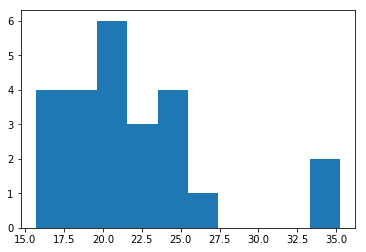

In [18]:
# Build the visualizations here
plt.hist(df['Incongruent']);

In incongruent graph there is 2 extreem values that may affect the mean value.
<ul>the mod in the congruent is 15</ul>
<ul>the mod in the incongruent is 20</ul>

In [19]:
df[df['Incongruent'] < 30].mean()

Congruent      13.939000
Incongruent    20.856318
dtype: float64

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

We have one sample and it paired (each person in the sample did both tests). Also, we have a small sample and the population variance is unknown. Based on this information we will use the t-test.

#### Using the t test

In [32]:
# Perform the statistical test here
import scipy.stats as stats

In [33]:
congruent = df['Congruent'].values.tolist()
incongruent = df['Incongruent'].values.tolist()

In [34]:
## Perform ttest
stats.ttest_ind(congruent, incongruent, equal_var = False)

Ttest_indResult(statistic=-6.5322505539032285, pvalue=6.510167390442638e-08)

The p value is very small. Therefore, we will reject the null hypothesis which means there is a difference between the Congruent and incongruent. People reading time is longer in Incongruent test.

#### Using A/B Test

In [23]:
df2 = df[df['Incongruent'] < 30]

In [24]:
obs_diff = df['Congruent'].mean() - df['Incongruent'].mean()

In [25]:
diffs = []
size = df.shape[0]
for _ in range(10000):
    sample = df.sample(size, replace = True)
    congruent = sample['Congruent'].mean()
    incongruent = sample['Incongruent'].mean()
    diffs.append(congruent - incongruent)

In [26]:
diffs = np.array(diffs)

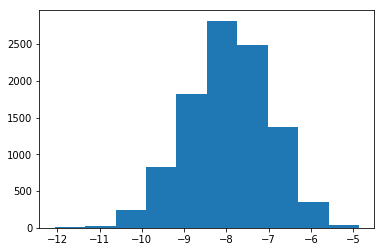

In [27]:
plt.hist(diffs);

In [28]:
null_vals = np.random.normal(0, diffs.std(), diffs.size)

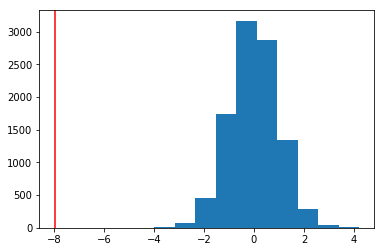

In [29]:
# plot null distribution
plt.hist(null_vals);

# plot line for observed statistic
plt.axvline(x = obs_diff, color = 'red');

In [30]:
(null_vals < obs_diff + (null_vals > 0 + (0 - obs_diff))).mean()

0.0

The p value is very small. Therefore, we will reject the null hypothesis which means there is a difference between the Congruent and incongruent. People reading time is longer in Incongruent test.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

Human mind starts to link things to the knowledge the person already has. A similar test is reading text with familiar words but in a wring spiling. The human mind will be able to read the words correctly without noticing the spelling mistakes